# CNN and the MNIST dataset

Back in the day the **MNIST** dataset was used as a standard benchmark for image classification models. We will use this dataset to evaluated the performance of **LeNet-5**, a Convolutional Neural Network (CNN) introduced by LeCun et al. in this paper in 1998:

*LeCun, Y.; Bottou, L.; Bengio, Y. & Haffner, P. (1998). Gradient-based learning applied to document recognition.Proceedings of the IEEE. 86(11): 2278 - 2324*.

By the way, this notebook is based on another notebook written by **Professor Benjamín Valdés Aguirre**. And now we import some libraries and modules.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

Using TensorFlow backend.


Conveniently enough, the MNIST dataset is included in the `tensorflow` library. Let us take advantage of that and import said dataset.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

This dataset contains 60.000 images of handwritten numbers with their labels for training, plus a set of 10.000 images for testing. 

In [3]:
print(f'Number of images in the training set is {X_train.shape[0]}.')
print(f'Number of images in the test set is {X_test.shape[0]}.')

Number of images in the training set is 60000.
Number of images in the test set is 10000.


For learning purposes, it is recommended to scale the values of the pixels of the images, which can be between 0 and 255. Let us do that in the following cell.

In [4]:
X_train = X_train / 255
X_test = X_test / 255

How do these images look like? Let us take a peek by selecting randomly four images from the training set. The following code does this by using the `matplotlib` library for visualization purposes.

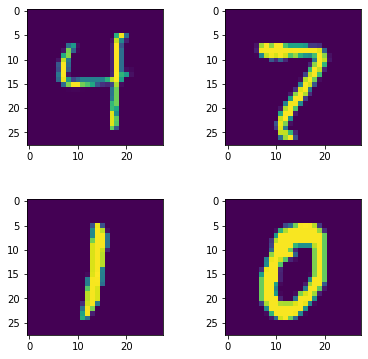

In [5]:
num_train_images = X_train.shape[0]
random_index = np.random.choice(num_train_images, 4)
random_train_images = X_train[random_index]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for n in range(4):
    i, j = divmod(n, 2)
    axes[i, j].imshow(random_train_images[n])
    
plt.show()

Now we add an extra dimension to our data since this is required by the `tensorflow` library. This can be done easily by the `reshape` method from the `numpy` library.

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In the following cell we will implement the **LeNet-5** CNN. The architecture of this CNN is shown in the following figure.

<img src="LeNet.png" alt="Drawing" style="width: 300px;"/>

Image taken from https://en.wikipedia.org/wiki/LeNet.

In [7]:
model = Sequential([
                    Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='same', activation="sigmoid", input_shape=(28,28,1)),
                    AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation="sigmoid"),
                    AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(120, activation='sigmoid'),
                    Dense(84, activation='sigmoid'),                
                    Dense(10, activation='softmax')
                    ])

2022-10-05 18:38:40.251665: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 18:38:40.251936: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


After telling `tensorflow` how our CNN should be, we need to `compile` the model. In this step we must specify the type of gradient descent method we want to use (`optimizer`), the cost function to be minimized (`loss`), and the metric we want to use to evaluate our model (`metrics`).

In [8]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

We are ready to train the model using the `fit` method. 

In [9]:
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.7943 - accuracy: 0.7401
Epoch 2/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1818 - accuracy: 0.9451
Epoch 3/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1167 - accuracy: 0.9639
Epoch 4/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0890 - accuracy: 0.9724
Epoch 5/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0733 - accuracy: 0.9773


Notice that the training ran for five epochs and returned the training history, which be used for plotting the learning curves.

In [10]:
df_history = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

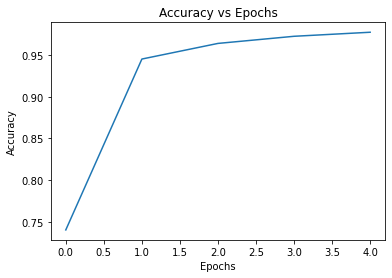

In [11]:
acc_plot = df_history.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

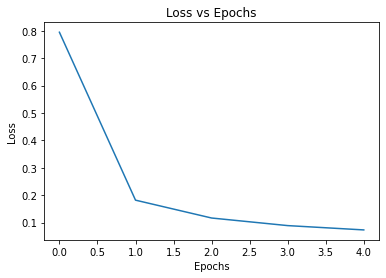

In [12]:
acc_plot = df_history.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

With the `evaluate` method we can see how well our method performs on the test set, which is data that was not included in the training phase.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/10000 [==============================] - 6s 638us/step
Test loss: 0.07602351574208588
Test accuracy: 0.9753999710083008


As you can see, the CNN proposedf by LeCun et al. did pretty well. Let us now see how the trained model does on four handwritten digits that are chosen randomly from the test set.

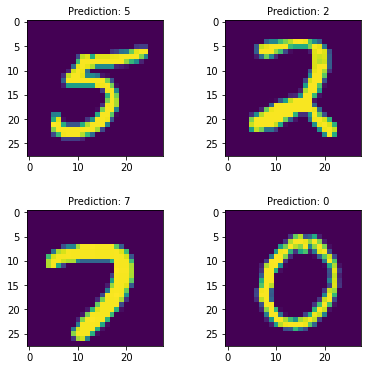

In [14]:
num_test_images = X_test.shape[0]
random_index = np.random.choice(num_test_images, 4)
random_test_images = X_test[random_index]
predictions = model.predict(random_test_images)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for n, prediction in enumerate(predictions):
    i, j = divmod(n,2)
    axes[i, j].imshow(random_test_images[n])
    axes[i, j].text(8, -1.5, f'Prediction: {np.argmax(prediction)}')
    
plt.show()

As you probably know by now, `MaxPooling` and `ReLU` are prefered over `AveragePooling` and `sigmoid`, respectively. This is the case because better results are, in general, obtained when these options are chosen for building our neural network. This said, we probably can do better by using the same architecture, but insted of using `sigmoid` as an activation function and computing an average when pooling is done, let us use `MaxPooling` and `ReLU` instead.

In [15]:
model = Sequential([
                    Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='same', activation="relu", input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation="relu"),
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(84, activation='relu'),                
                    Dense(10, activation='softmax')
                    ])

As usual, let us compile and train our new model.

In [16]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1833 - accuracy: 0.9442
Epoch 2/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0620 - accuracy: 0.9806
Epoch 3/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0467 - accuracy: 0.9856
Epoch 4/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0344 - accuracy: 0.9889
Epoch 5/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0284 - accuracy: 0.9913


And finally, we can see how well it performed.

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/10000 [==============================] - 6s 598us/step
Test loss: 0.035598537043072795
Test accuracy: 0.9894999861717224


Almost two points better than the original LeNet-5! Not bad. As you can see, both the type of pooling and the type of activation function that we use make a difference.

## References

[1] https://www.kaggle.com/code/kannannadars/ann-using-mnist-dataset

[2] https://en.wikipedia.org/wiki/LeNet